<a href="https://colab.research.google.com/github/dyjdlopez/deep_learning/blob/main/notebooks/module%2001/deeplearn_02v1_lab1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 2: Training Routines and Monitoring
$_{\text{©D.J. Lopez | 2022 | Deep Learning}}$


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorboard

from google.colab import drive
import os
import datetime

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For this activity we will be using the [MNIST Hand-written letter dataset](http://yann.lecun.com/exdb/mnist/) by Y. LeCunn et al (2010). It is an image dataset wherein we will try to classify using DNNs.  

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

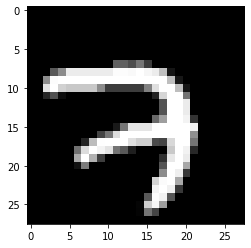

In [ ]:
## Let's try to see some examples
plt.imshow(x_train[0],cmap='gray')

In [ ]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

55000 train set
5000 validation set
10000 test set


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')

])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

## Part 1: Callbacks and Checkpoints

In [ ]:
## Set up your log file locations especially for model checkpoints
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint_filepath = 'drive/MyDrive/deeplearn/lab02/tmp/ckpts/'

### Checkpoints
Checkpoints are points non-final model weights it is saved in during training in which it follows certain criteria such as lower losses or higher accuracies. These would help you back-track and audit your model training. We allow checkpoints using TF Callbacks.

### Callbacks
Callbacks are like helper functions in your model procedure. They can help in numerous ways not just with logging and checkpoints. Callbacks can also immediately stop training when there are possible instances of saddlepoints or model divergence. Some of the functions that you could use as callbacks are:


* [BackupAndRestore](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/BackupAndRestore) - Callback to back up and restore the training state.
* [BaseLogger](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/BaseLogger) - Callback that accumulates epoch averages of metrics.
* [CSVLogger](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger) - Callback that streams epoch results to a CSV file.
* [Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) - Abstract base class used to build new callbacks.
* [CallbackList](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CallbackList) - Container abstracting a list of callbacks.
* [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - Stop training when a monitored metric has stopped improving.
* [History](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History) - Callback that records events into a `History` object.
* [LambdaCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback) - Callback for creating simple, custom callbacks on-the-fly.
* [LearningRateScheduler](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) - Automatically adjusts the learning rate based on epoch numbers.
* [ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - Callback to save the Keras model or model weights at some frequency.
* [ProgbarLogger](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ProgbarLogger) - Callback that prints metrics to stdout.
* [ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) - Reduce learning rate when a metric has stopped improving
* [RemoteMonitor](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/RemoteMonitor) - Callback used to stream events to a server.
* [TensorBoard](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - Enable visualizations for TensorBoard.
* [TerminateOnNaN](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TerminateOnNaN) - Callback that terminates training when a NaN loss is encountered.



In [ ]:
## This is a TF Callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath+'model.weights_best.hdf5',
    verbose = 1,
    save_best_only=True)

## Part 1: TensorBoard

In [ ]:
# For Refreshing the TensorBoard process. Use this to refresh the logs
!kill 386
%reload_ext tensorboard
!rm -rf ./logs/

/bin/bash: line 0: kill: (386) - No such process


In [ ]:
EPOCHS = 10
%tensorboard --logdir logs/fit
hist = model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 validation_data=(x_valid,y_valid),
                 callbacks=[tensorboard_callback, 
                            model_checkpoint_callback],
                 verbose=1) 

In [ ]:
model.load_weights(checkpoint_filepath+'model.weights_best.hdf5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9438999891281128


In [ ]:
model.save('saved_model/lab02_mnist')
model.save('saved_model/lab02_mnist.hdf5')

INFO:tensorflow:Assets written to: saved_model/lab02_mnist/assets


INFO:tensorflow:Assets written to: saved_model/lab02_mnist/assets


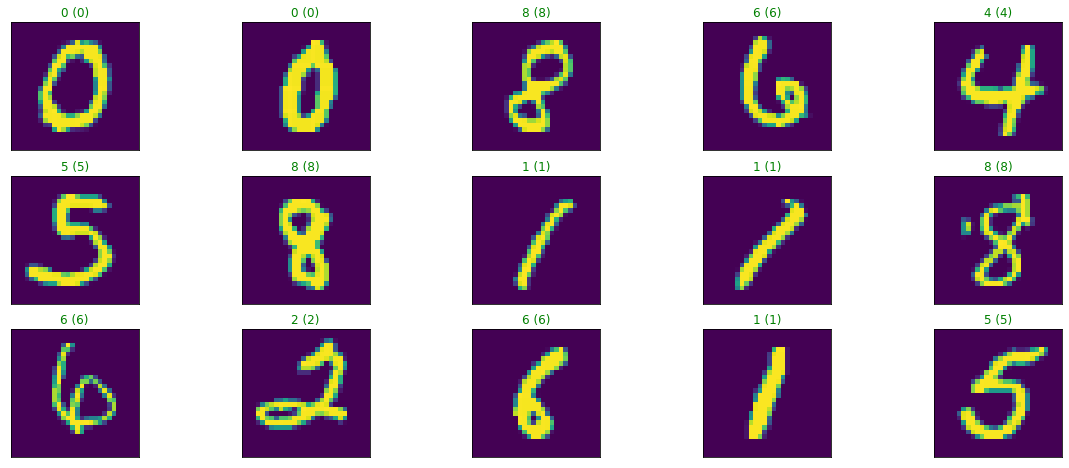

In [ ]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green" if predict_index == true_index else "red"))